<a href="https://colab.research.google.com/github/saumya-nauni/ML-Sem-V/blob/master/Lab/Experiment%207/Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_covtype, fetch_kddcup99, fetch_lfw_pairs, fetch_lfw_people, fetch_olivetti_faces
from sklearn.datasets import fetch_rcv1, load_breast_cancer, load_digits, load_wine

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

In [3]:
from keras import models
from keras import layers
from keras.utils import to_categorical

In [4]:
forest = fetch_covtype()
x_fetch_covtype = forest.data
y_fetch_covtype = forest.target

In [5]:
x_forest = pd.DataFrame(x_fetch_covtype)
y_forest = pd.DataFrame(y_fetch_covtype)
print(x_forest.shape)
print(y_forest.shape)

(581012, 54)
(581012, 1)


In [6]:
y_fore = y_forest.replace([1,2,3,4,5,6,7], [0,1,2,3,4,5,6])
y_fore = to_categorical(y_fore)
x_train, x_test, y_train, y_test = train_test_split(x_forest, y_fore, test_size = 0.2)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = 0.5)
print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)

(464809, 54)
(58101, 54)
(58102, 54)
(464809, 7)
(58101, 7)
(58102, 7)


In [7]:
nn_forest = models.Sequential()
nn_forest.add(layers.Dense(512, activation = 'relu', input_shape = (54, )))
nn_forest.add(layers.Dense(256, activation = 'relu'))
nn_forest.add(layers.Dense(128, activation = 'relu'))
nn_forest.add(layers.Dense(54, activation = 'relu'))
nn_forest.add(layers.Dense(7, activation = 'softmax'))
nn_forest.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
forest_history = nn_forest.fit(x_train, y_train, epochs = 75, batch_size = 5000, validation_data = (x_dev, y_dev))
for_dev_acc = nn_forest.evaluate(x_dev, y_dev)[1]
print('The dev accuracy is',for_dev_acc)

Epoch 1/75
93/93 [==============================] - 11s 122ms/step - loss: 18.6668 - accuracy: 0.3986 - val_loss: 8.1349 - val_accuracy: 0.2640
Epoch 2/75
93/93 [==============================] - 11s 118ms/step - loss: 3.4023 - accuracy: 0.4162 - val_loss: 1.5911 - val_accuracy: 0.4573
Epoch 3/75
93/93 [==============================] - 11s 119ms/step - loss: 1.8531 - accuracy: 0.4310 - val_loss: 1.1580 - val_accuracy: 0.4304
Epoch 4/75
93/93 [==============================] - 11s 119ms/step - loss: 1.3926 - accuracy: 0.4505 - val_loss: 1.2966 - val_accuracy: 0.4597
Epoch 5/75
93/93 [==============================] - 11s 120ms/step - loss: 1.2439 - accuracy: 0.4736 - val_loss: 1.1193 - val_accuracy: 0.4270
Epoch 6/75
93/93 [==============================] - 11s 119ms/step - loss: 1.3050 - accuracy: 0.4807 - val_loss: 1.1642 - val_accuracy: 0.4911
Epoch 7/75
93/93 [==============================] - 11s 120ms/step - loss: 1.0869 - accuracy: 0.5036 - val_loss: 0.9577 - val_accuracy: 0.568

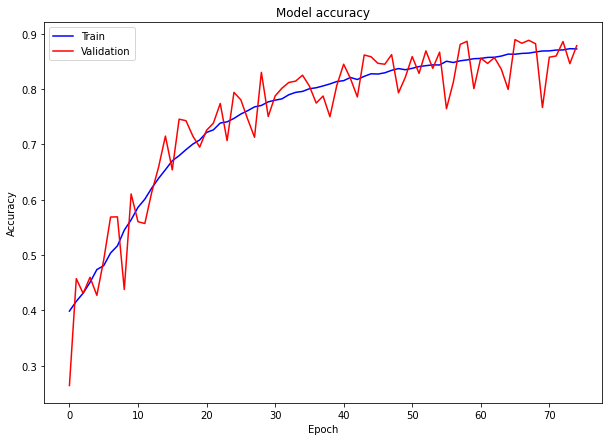

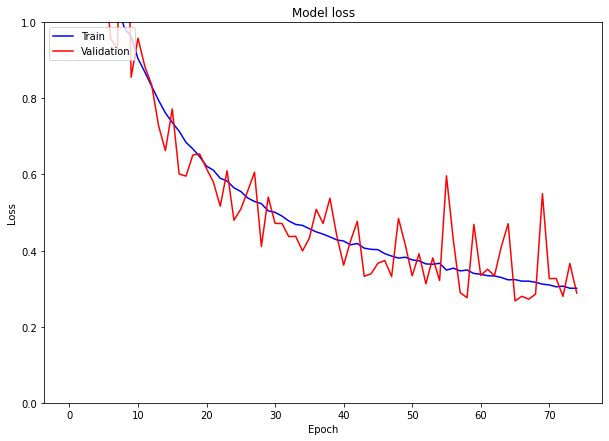

In [9]:
plt.figure(figsize = (10,7))
plt.plot(forest_history.history['accuracy'], color = 'blue')
plt.plot(forest_history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(forest_history.history['loss'], color = 'blue')
plt.plot(forest_history.history['val_loss'], color = 'red')
plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [10]:
for_test_acc = nn_forest.evaluate(x_test, y_test)[1]
print('The test accuracy is',for_test_acc)

1816/1816 [==============================] - 2s 1ms/step - loss: 0.2855 - accuracy: 0.8787
The test accuracy is 0.8787133097648621
